# Library Imports

In [1]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
from utils.Combinations import *
pd.set_option('display.max_columns', None)  
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Preparation Networks

## Users Followers

In [24]:
df_user_followers = pd.read_csv(r"../data/interim/UserFollowers.csv",dtype=str)
df_user_followers.head()

,UserId,FollowerUserId
0,368,993
1,368,1902
2,368,1950
3,368,3258
4,368,3429


In [27]:
df_user_followers.to_csv(r"../data/processed/DiGraph_Followers.csv",index=False)

## Users Teams

In [4]:
df_team_memberships = pd.read_csv(r"../data/interim/TeamMemberships.csv",dtype=str)
df_team_memberships.head()

,TeamId,UserId
0,518,635
1,526,839
2,527,816
3,528,778
4,529,747


In [5]:
df_team_member_1 = df_team_memberships.copy()
df_team_member_2 = df_team_memberships.copy()

df_team_member_1.rename(columns={"UserId":"UserId_1"},inplace=True)
df_team_member_2.rename(columns={"UserId":"UserId_2"},inplace=True)

print(df_team_member_1.shape)
print(df_team_member_2.shape)

(5478304, 2)
(5478304, 2)


In [6]:
df_team_member_3 = df_team_member_1.merge(df_team_member_2, how='inner', on=['TeamId'])
df_team_member_3.shape

(5982968, 3)

In [7]:
df_team_member_3 = df_team_member_3[df_team_member_3["UserId_1"]!=df_team_member_3["UserId_2"]]
df_team_member_3.shape

(504664, 3)

In [8]:
df_team_member_3 = df_team_member_3.groupby(df_team_member_3.apply(frozenset, axis=1), as_index=False).first()
df_team_member_3.shape

(252332, 3)

In [9]:
df_team_member_3.head()

,TeamId,UserId_1,UserId_2
0,532,820,879
1,5687559,709892,5981595
2,5689041,4014930,3818471
3,5689449,6030807,5983865
4,5689449,6030807,5939582


In [10]:
df_team_memberships[df_team_memberships["TeamId"]=="999285"]

,TeamId,UserId
879956,999285,443070
879957,999285,823629
879958,999285,1382489


In [11]:
#Equipos con mas de 2 integrantes
df_team_memberships.groupby("TeamId").size()[df_team_memberships.groupby("TeamId").size()>2]

TeamId
1000101    3
100044     5
100062     4
100088     4
10009      3
          ..
99841      4
998548     5
999285     3
99943      3
99947      3
Length: 35798, dtype: int64

In [12]:
#Validamos la estructura del grafo no dirigido
df_team_member_3[df_team_member_3["TeamId"]=="999285"]

,TeamId,UserId_1,UserId_2
142874,999285,443070,823629
142875,999285,443070,1382489
142876,999285,823629,1382489


In [13]:
#MultiGraph
df_team_member_3.to_csv(r"../data/processed/MultiGraph_Teams.csv",index=False)

## User Comments

In [3]:
df_forum_messages = pd.read_csv(r"../data/interim/ForumMessages.csv",dtype=str)
df_forum_messages.head()

,ForumTopicId,UserId,Medal
0,2,368,NaN
1,16,368,NaN
2,16,368,NaN
3,20,368,NaN
4,20,368,NaN


In [4]:
print(df_forum_messages.shape)

(1308300, 3)


In [5]:
df_forum_messages = df_forum_messages[["ForumTopicId","UserId"]].drop_duplicates()
print(df_forum_messages.shape)

(866218, 2)


In [6]:
df_forum_messages_size = df_forum_messages.groupby("ForumTopicId").size().to_frame('Comments').reset_index()
df_forum_messages_size.head()

,ForumTopicId,Comments
0,1,9
1,10,2
2,100,4
3,10000,2
4,100001,1


In [7]:
df_forum_messages = df_forum_messages.merge(df_forum_messages_size, how='left', on=['ForumTopicId'])
print(df_forum_messages.shape)

(866218, 3)


In [8]:
df_forum_messages = df_forum_messages[df_forum_messages["Comments"]!=1]
print(df_forum_messages.shape)

(783284, 3)


In [9]:
df_forum_messages["ForumTopicId_Int"] = df_forum_messages["ForumTopicId"].astype(int)
Validator.validar_numerico(df_forum_messages,["ForumTopicId_Int","Comments"])

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,ForumTopicId_Int,783284,0,0.0,0,0.0,145572,162343.30,1,334147,487211.25,446307.96,159519.0,243400.5,297670.0,312809.0,329412.0,0,0.00,0,0.00,78328,10.00,39164,5.00,7813,1.0
0,Comments,783284,0,0.0,0,0.0,198,628.89,2,21282,43.00,11013.01,7.0,19.0,62.0,388.0,21282.0,99816,12.74,21282,2.72,77919,9.95,39121,4.99,0,0.0


In [10]:
df_forums = pd.read_csv(r"../data/interim/Forums.csv",dtype=str)
df_forums.head()

,ForumId,ParentForumId,Title
0,1,8,Predict HIV Progression
1,2,8,Forecast Eurovision Voting
2,3,8,World Cup 2010 - Take on the Quants
3,4,8,INFORMS Data Mining Contest 2010
4,5,NaN,Active Competitions


In [11]:
df_forum_topics = pd.read_csv(r"../data/interim/ForumTopics.csv",dtype=str)
df_forum_topics.head()

,ForumTopicId,ForumId,Title,TotalViews,TotalMessages,Score
0,1,1,A few techniques you might try:,9405.0,19.0,0.0
1,2,1,Question regarding algorithms used,2185.0,3.0,0.0
2,3,1,Question about data,2121.0,3.0,0.0
3,4,1,Biased sets,2780.0,4.0,1.0
4,5,1,Non-standard nucleotide codings,2045.0,2.0,0.0


In [12]:
df_forums = df_forums[["ForumId","ParentForumId","Title"]]
df_forum_topics = df_forum_topics[["ForumTopicId","ForumId"]]
df_forum_topics_merge = df_forum_topics.merge(df_forums,how="left",on=["ForumId"])
df_forum_topics_merge.head()

,ForumTopicId,ForumId,ParentForumId,Title
0,1,1,8,Predict HIV Progression
1,2,1,8,Predict HIV Progression
2,3,1,8,Predict HIV Progression
3,4,1,8,Predict HIV Progression
4,5,1,8,Predict HIV Progression


In [13]:
df_forum_topics_merge["ParentForumId"].value_counts()

9       65287
8       64636
1023    16330
5        2524
52        544
6         456
198       335
91        214
Name: ParentForumId, dtype: int64

In [14]:
df_forum_messages.head()

,ForumTopicId,UserId,Comments,ForumTopicId_Int
0,2,368,3,2
2,20,368,5,20
3,26,368,28,26
5,30,368,3,30
6,34,368,8,34


In [15]:
df_forum_join = df_forum_messages.merge(df_forum_topics_merge,how="left",on=["ForumTopicId"])
df_forum_join.head()

,ForumTopicId,UserId,Comments,ForumTopicId_Int,ForumId,ParentForumId,Title
0,2,368,3,2,1,8,Predict HIV Progression
1,20,368,5,20,1,8,Predict HIV Progression
2,26,368,28,26,15,9,General
3,30,368,3,30,4,8,INFORMS Data Mining Contest 2010
4,34,368,8,34,4,8,INFORMS Data Mining Contest 2010


<AxesSubplot:xlabel='ParentForumId', ylabel='Comments'>

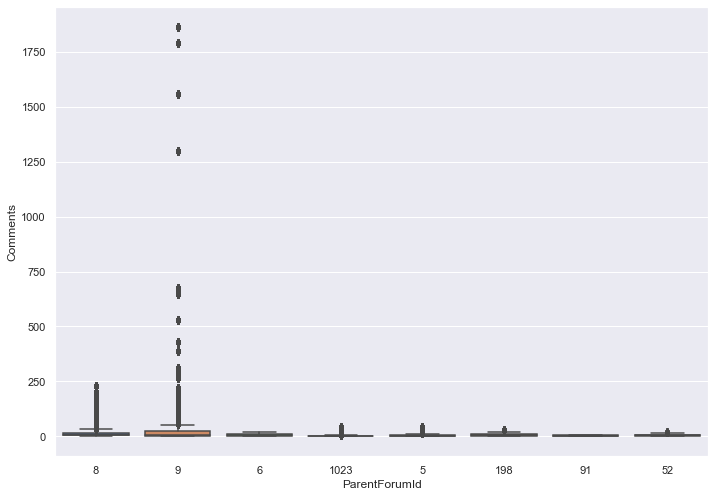

In [16]:
sns.boxplot(data=df_forum_join, x='ParentForumId', y='Comments')

In [19]:
df_forum_messages[df_forum_messages["Comments"]>250]["ForumTopicId"]

111053    21282
256646     3105
60581      1862
256489     1789
196005     1556
27191      1430
196018     1299
28961      1051
89570       673
36681       659
60914       659
161283      646
28793       627
36649       626
24616       530
19887       498
161285      427
44940       402
161289      388
42349       385
128094      323
48757       309
102365      306
293861      301
44915       299
256538      288
40958       286
36339       269
196685      264
Name: ForumTopicId, dtype: int64

In [20]:
df_forum_topics = pd.read_csv(r"../data/interim/ForumTopics.csv",dtype=str)
df_forum_topics.head()

,ForumTopicId,ForumId,Title,TotalViews,TotalMessages,Score
0,1,1,A few techniques you might try:,9405.0,19.0,0.0
1,2,1,Question regarding algorithms used,2185.0,3.0,0.0
2,3,1,Question about data,2121.0,3.0,0.0
3,4,1,Biased sets,2780.0,4.0,1.0
4,5,1,Non-standard nucleotide codings,2045.0,2.0,0.0


In [24]:
df_forum_topics[df_forum_topics["ForumTopicId"]=="111053"]

,ForumTopicId,ForumId,Title,TotalViews,TotalMessages,Score
121076,111053,16860,Titanic Tutorial,0.0,26084.0,7320.0


In [23]:
df_forums = pd.read_csv(r"../data/interim/Forums.csv",dtype=str)
df_forums[df_forums["ForumId"]=="16860"]

,ForumId,ParentForumId,Title
4711,16860,NaN,Notebooks


In [10]:
df_forum_messages_1 = df_forum_messages[df_forum_messages["ForumTopicId_Int"]<=100000]
df_forum_messages_1.drop(["ForumTopicId_Int"],axis=1,inplace=True)
df_forum_messages_2 = df_forum_messages[(df_forum_messages["ForumTopicId_Int"]>100000) & (df_forum_messages["ForumTopicId_Int"]<=150000)]
df_forum_messages_2.drop(["ForumTopicId_Int"],axis=1,inplace=True)
df_forum_messages_3 = df_forum_messages[(df_forum_messages["ForumTopicId_Int"]>150000) & (df_forum_messages["ForumTopicId_Int"]<=200000)]
df_forum_messages_3.drop(["ForumTopicId_Int"],axis=1,inplace=True)
df_forum_messages_4 = df_forum_messages[(df_forum_messages["ForumTopicId_Int"]>200000) & (df_forum_messages["ForumTopicId_Int"]<=250000)]
df_forum_messages_4.drop(["ForumTopicId_Int"],axis=1,inplace=True)
df_forum_messages_5 = df_forum_messages[(df_forum_messages["ForumTopicId_Int"]>250000) & (df_forum_messages["ForumTopicId_Int"]<=300000)]
df_forum_messages_5.drop(["ForumTopicId_Int"],axis=1,inplace=True)
df_forum_messages_6 = df_forum_messages[(df_forum_messages["ForumTopicId_Int"]>300000)]
df_forum_messages_6.drop(["ForumTopicId_Int"],axis=1,inplace=True)

In [11]:
print(df_forum_messages_1.shape)
print(df_forum_messages_2.shape)
print(df_forum_messages_3.shape)
print(df_forum_messages_4.shape)
print(df_forum_messages_5.shape)
print(df_forum_messages_6.shape)

(239505, 3)
(132407, 3)
(113367, 3)
(118332, 3)
(107824, 3)
(71849, 3)


In [12]:
df_forum_messages_2.head()

,ForumTopicId,UserId,Comments
264,101221,368,7
265,101327,368,5
266,102218,368,6
267,102149,368,3
268,102391,368,9


In [13]:
df_forum_messages_2[df_forum_messages_2["ForumTopicId"]=="101221"]

,ForumTopicId,UserId,Comments
264,101221,368,7
95513,101221,286036,7
192550,101221,808263,7
217003,101221,952137,7
286313,101221,1364892,7
398462,101221,2243477,7
408607,101221,2352583,7


In [14]:
df_forum_messages_2.sort_values("Comments",ascending=False)

,ForumTopicId,UserId,Comments
432057,111053,2646524,21282
653428,111053,4962799,21282
652667,111053,4958617,21282
652679,111053,4959493,21282
652680,111053,4959494,21282
...,...,...,...
142806,114397,520911,2
314878,147049,1577135,2
407664,126451,2344111,2
142996,117634,521550,2


In [64]:
df_aux = Combinations.create_combinations(df = df_forum_messages_2,group_by = "ForumTopicId",name_col_1 ="UserId_1",name_col_2 = "UserId_2")
df_aux.head()
